In [2]:
import pandas as pd

# Load the data from the uploaded file
file_path = 'energydata_complete.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
data.info(), data.head(), data.isnull().sum(),


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

(None,
                   date  Appliances  lights     T1       RH_1    T2       RH_2  \
 0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
 1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
 2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
 3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
 4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   
 
       T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
 0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
 1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
 2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
 3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
 4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   
 
    RH_out 

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Step 1: Data Preprocessing
# Parse the date column and drop irrelevant columns
data['date'] = pd.to_datetime(data['date'])
data = data.drop(columns=['rv1', 'rv2'])

# Normalize numerical columns
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data.drop(columns=['date'])),
                           columns=data.columns[1:])

# Step 2: Feature Selection (Correlation)
correlation = scaled_data.corr()['Appliances'].sort_values(ascending=False)
selected_features = correlation[1:11].index.tolist()  # Top 10 features

# Prepare the dataset for modeling
X = scaled_data[selected_features]
y = scaled_data['Appliances']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Building
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean square error is {mse}") 
print(f"Root mean square error is {rmse}") 
print(f"R-Squared (R²) is {r2}") 



Mean square error is 0.007928943954983583
Root mean square error is 0.0890446177766157
R-Squared (R²) is 0.09285846918622542


## Data Visualization


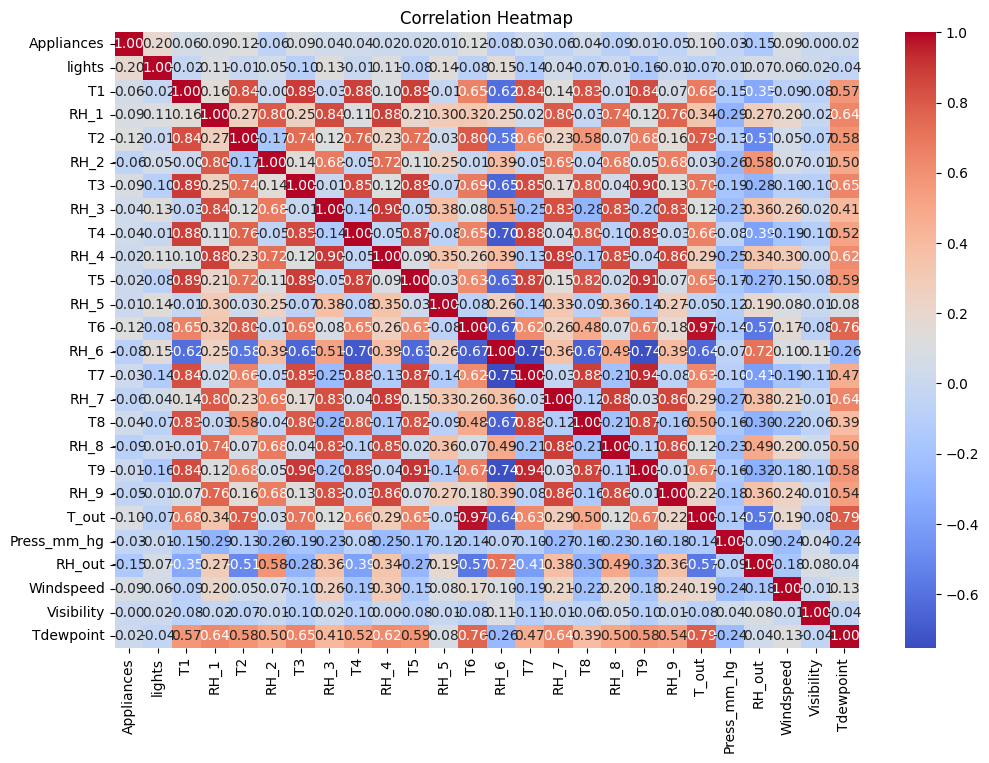

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(scaled_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Correlation Heatmap highlights the correlation between all features and the target variable (Appliances). 
# It provides a quick overview of which features are strongly correlated with energy consumption.


c:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


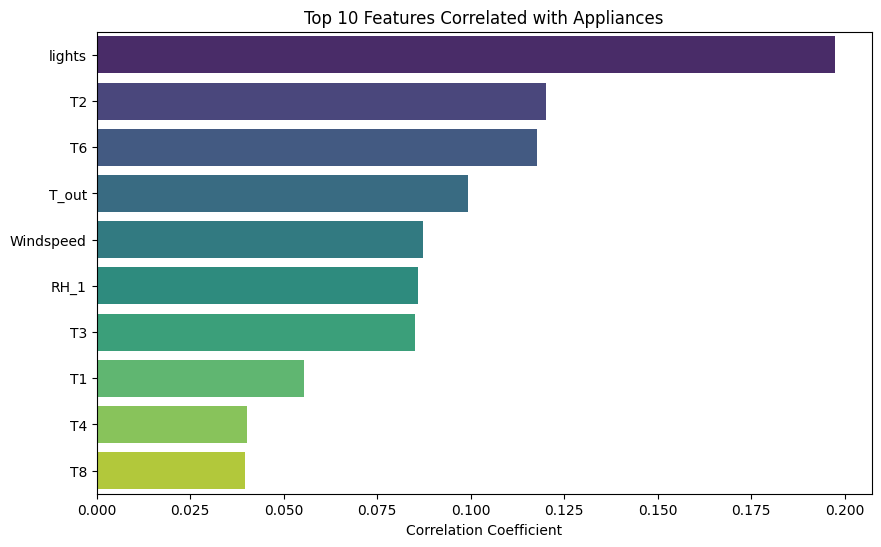

In [5]:
top_features = correlation[1:11]  # Top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")
plt.title("Top 10 Features Correlated with Appliances")
plt.xlabel("Correlation Coefficient")
plt.show()

#This bar chart showcases the top 10 features most correlated with Appliances. 
#These features were selected for building the regression model.

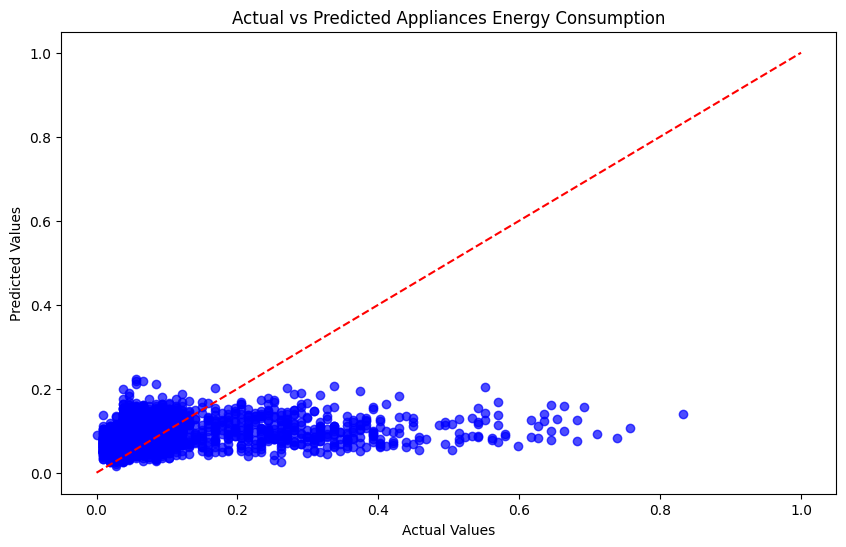

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([0, 1], [0, 1], '--r')  # Line of perfect prediction
plt.title("Actual vs Predicted Appliances Energy Consumption")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

#This scatter plot compares the actual energy consumption values with the predicted values from the regression model.
#The red line represents perfect predictions.


c:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HomePC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


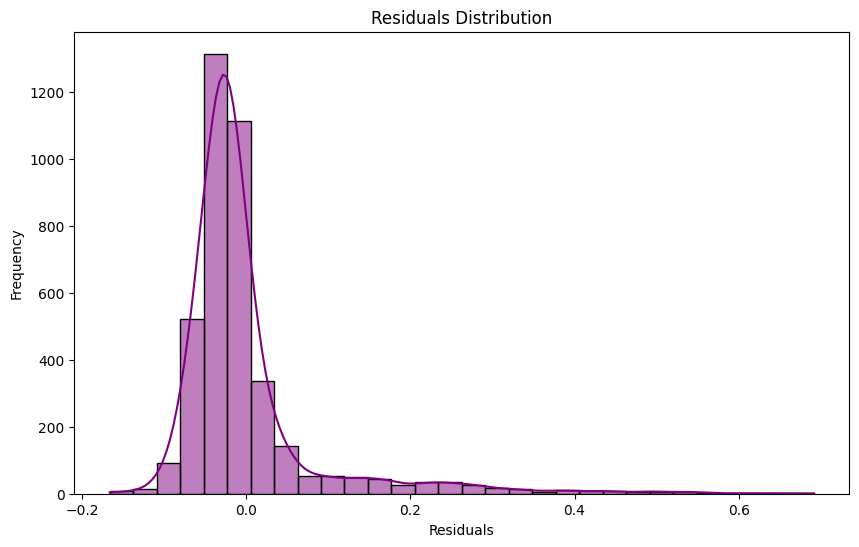

In [7]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color="purple")
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

#The residual plot shows the distribution of errors (differences between actual and predicted values). 
#A roughly normal distribution of residuals indicates a good model fit.